In [17]:
import pandas as pd
import numpy as np

df=pd.read_csv('../data/house_data_fs.csv', index_col = 0)
df = df.dropna()
df1 = df.head(50)


### Linear regression model using a single feature

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df1[['sqft_living','bedrooms']].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Do not reshape, keep as (50, 2)

lr = LinearRegression()
model = lr.fit(X_scaled, y)

In [19]:
Y_pred_linear = lr.predict(X_scaled)
rscore_linear = lr.score(X_scaled, y)
mse_linear = mean_squared_error(y, Y_pred_linear)
mae_linear = mean_absolute_error(y, Y_pred_linear)
print('Multiple Linear Regression:')
print('r2-score:', np.round(rscore_linear, 3), 
      '\nmean squared error:', np.round(mse_linear, 2), 
      '\nmean absolute error:', np.round(mae_linear, 2))

Multiple Linear Regression:
r2-score: 0.423 
mean squared error: 61619674038.75 
mean absolute error: 164763.13


### Visualization for Linear Regression model

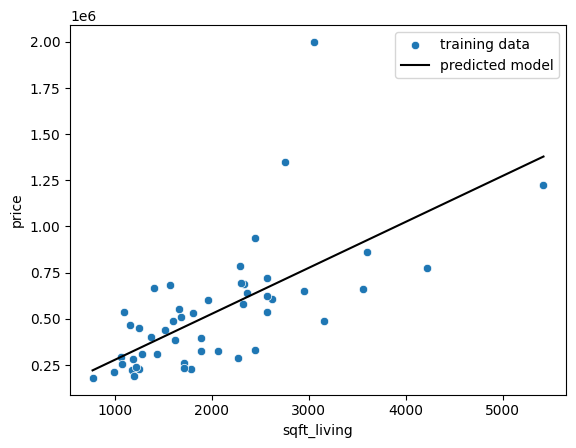

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
# x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
# y_model = model.predict(scaler.fit_transform(x_model.reshape(-1,1)))
# plt.plot(x_model,  y_model, color = 'k')
# plt.legend(['training data', 'predicted model'])
# plt.show()

### Polynomial regression :
1) Feature scaling and Transform poly features 
2) model using a linear regression. 
3) Predict using the Model 

In [13]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Poly transformation 
order = 5
poly = PolynomialFeatures(degree=order, include_bias=False)
poly_features = poly.fit_transform(X_scaled)

# Modeling. 
lr = LinearRegression()
model = lr.fit(poly_features, y)
print(model.coef_, model.intercept_)

#Prediction

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print('r2-score:', np.round(rscore,3), '\nmean squared error:', np.round(mse), '\nmean absolute error:', np.round(mae))


[ 3.17007529e+06  2.15957481e+06  1.63012312e+07 -1.29839778e+07
 -1.65316279e+06  1.45787143e+07  3.35345927e+05 -2.04227754e+07
  2.82462542e+06 -2.43943277e+05  1.75518850e+07 -6.12877851e+07
  4.85387391e+07 -9.11921966e+06  2.08179388e+03  2.47760133e+05
 -3.58083875e+07  4.50917009e+07 -1.63384986e+07  3.23007757e+06] 2271915.440274698
r2-score: 0.62 
mean squared error: 40567034684.0 
mean absolute error: 117757.0


### Visualization for Poly regression

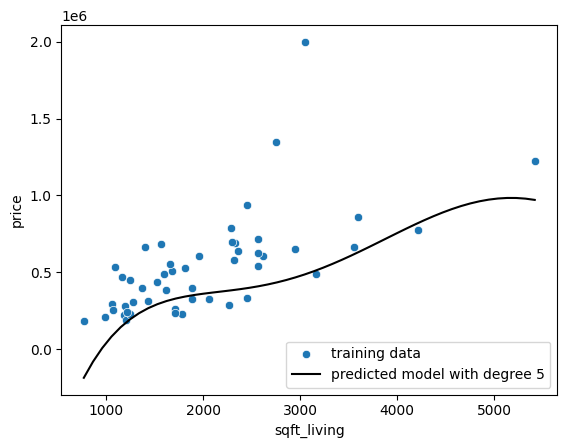

In [ ]:
# sns.scatterplot(data = df1, x = 'sqft_living', y = 'price')
# x_model = np.linspace(df1['sqft_living'].min(), df1['sqft_living'].max(), 50)
# x_model_scaled = scaler.fit_transform(x_model.reshape(-1,1))

# x_model_poly  = poly.fit_transform(x_model_scaled)
# y_model = model.predict(x_model_poly)

# plt.plot(x_model,  y_model, color = 'k')
# plt.legend(['training data', 'predicted model with degree ' + str(order)])
# plt.show()

In [14]:
import joblib
for degree in range(2, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    poly_features = poly.fit_transform(X_scaled)
    lr = LinearRegression()
    model = lr.fit(poly_features, y)
    Y_pred = model.predict(poly_features)
    rscore = model.score(poly_features, y)
    mse = mean_squared_error(y, Y_pred)
    mae = mean_absolute_error(y, Y_pred)
    print(f"Degree: {degree} | r2-score: {np.round(rscore, 3)} | mse: {np.round(mse, 2)} | mae: {np.round(mae, 2)}")

Degree: 2 | r2-score: 0.449 | mse: 58809893909.87 | mae: 162638.92
Degree: 3 | r2-score: 0.453 | mse: 58397966523.22 | mae: 163806.28
Degree: 4 | r2-score: 0.538 | mse: 49324162524.08 | mae: 141803.82
Degree: 5 | r2-score: 0.62 | mse: 40567034684.26 | mae: 117756.92


### Saving Best Model for Deployment

In [20]:
best_order = 2
X = df1['sqft_living'].values
y = df1['price'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1,1))

poly = PolynomialFeatures(degree=best_order, include_bias=False)
poly_features = poly.fit_transform(X_scaled.reshape(-1, 1))
    
lr = LinearRegression()
model = lr.fit(poly_features, y)

joblib.dump(model,'best_model.pkl')

Y_pred = model.predict(poly_features)
rscore = model.score(poly_features, y)
mse = mean_squared_error(y, Y_pred)
mae = mean_absolute_error(y, Y_pred)

print(f"Degree: {degree} | r2-score: {np.round(rscore, 3)} | mse: {np.round(mse, 2)} | mae: {np.round(mae, 2)}")

Degree: 5 | r2-score: 0.428 | mse: 60999286388.34 | mae: 157625.27
